In [3]:
%matplotlib notebook

In [4]:
import inspec
path_specs = 'data/spiders_specs_fe_and_continuum_removed.npy'
path_wave = 'data/wave.npy'
path_spiders_fits = 'data/spiders_quasar_bhmass-DR14.fits'

<IPython.core.display.Javascript object>


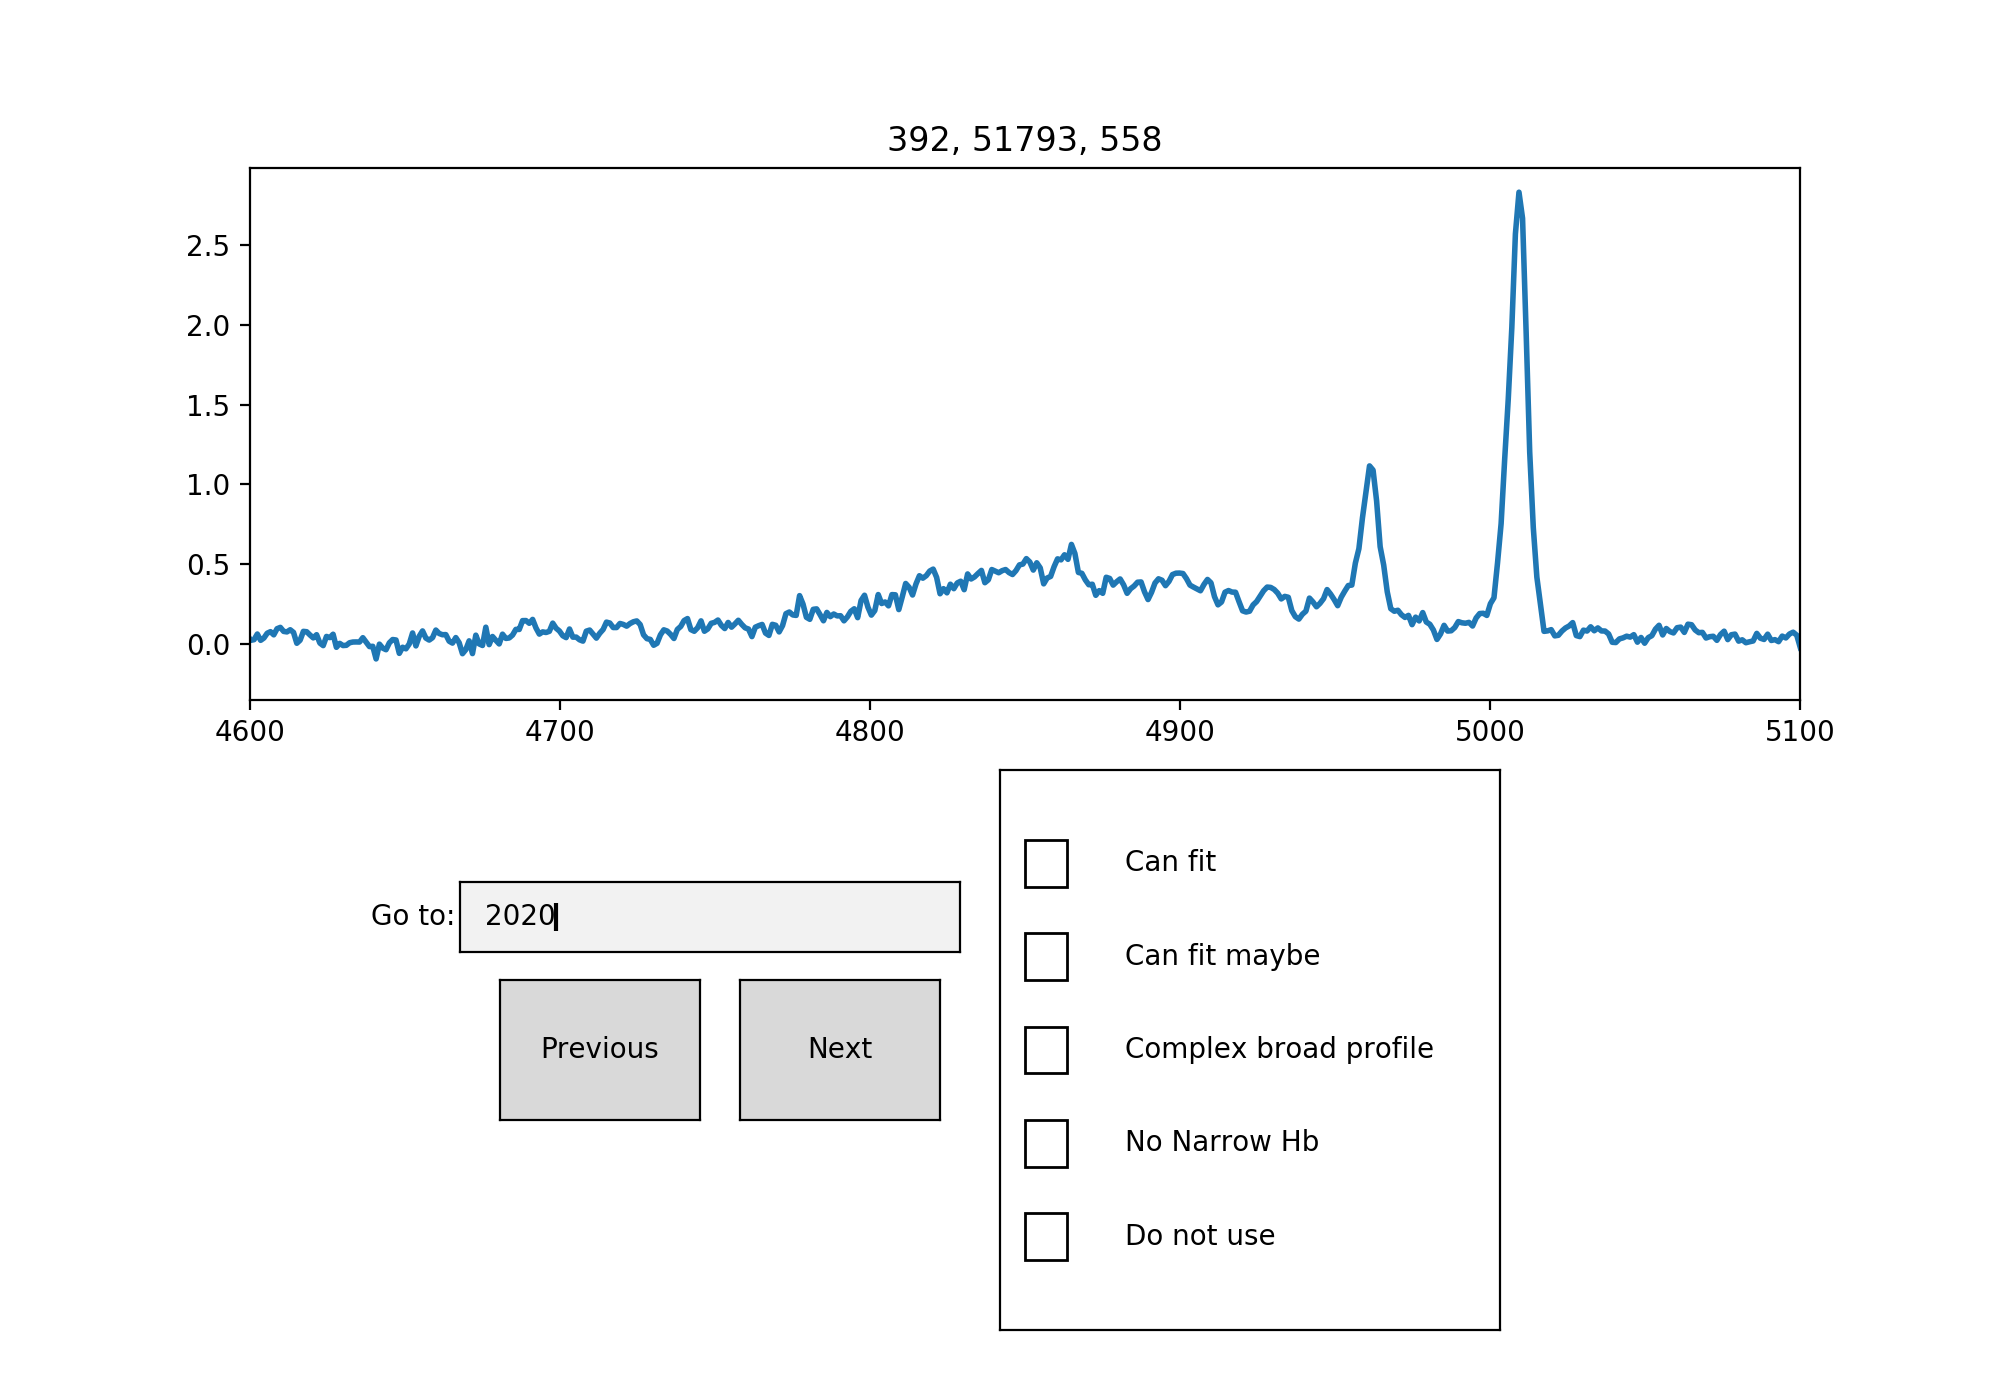

In [5]:
gui = inspec.inspec(path_specs, path_wave, path_spiders_fits)

In [ ]:
# check_again = 760 - 1030 - objects with no spectra that look ok on SDSS website

# guess: something went wrong in continuum fitting, due to steep continuum
# another gap up to 1722

In [6]:

c = numpy.load('choices.npy')
objects_to_fit = numpy.where(c[:,0] == 1)[0]
numpy.save('objects_to_fit', objects_to_fit)

complex_profile = numpy.where(c[:,2] == 1)[0]
numpy.save('complex_profile_0704', complex_profile)

no_nhb = numpy.where(c[:,3] == 1)[0]
numpy.save('no_nhb_0704', no_nhb)

# Notes:
-  the spectrum is in log scale - numpy.log( 1 + flux )
-  flux = (original flux - continuum - fe)/median(original flux)
- the sdss link is automatically copied to the clipboard

In [7]:
import numpy
c = numpy.load('choices.npy')
c.shape

(8302, 5)

In [9]:
numpy.save('all_objects', numpy.arange(8302))